# Análisis de Imágenes de Melanomas Cutáneos utilizando Filtros de Prewitt


- Juan Manuel De La Torre. 
  
  CC. 1001.186.267  jdela@unal.edu.co
- Juliana Catalina De Castro Moreno. 
  
  CC. 1000.706.954  jdec@unal.edu.co

---

Todo el codigo fuente puede encontrarse en el siguiente repositorio:
[Github](https://github.com/JM-delatorre/TecnicasIA)

# Primera aproximación de la aplicación filtro Prewitt


# Resúmen
El presente informe se centra en el análisis detallado del uso del filtro de Prewitt en 8 direcciones para el procesamiento de imágenes de melanomas cutáneos. Se aborda en profundidad la teoría detrás del filtro de Prewitt, su implementación en el procesamiento de imágenes médicas y su aplicación específica en el análisis de melanomas cutáneos. Se presentan resultados obtenidos de la aplicación del filtro en un conjunto de imágenes de melanomas, así como conclusiones y recomendaciones para futuras investigaciones.

# Introducción

El cáncer de piel, incluido el melanoma cutáneo, representa un importante problema de salud pública en todo el mundo. La detección temprana y precisa del melanoma es crucial para un tratamiento efectivo y la mejora de la supervivencia del paciente. El análisis de imágenes médicas juega un papel fundamental en este proceso al proporcionar información valiosa sobre las características y la naturaleza de los melanomas cutáneos. En este contexto, el filtro de Prewitt en 8 direcciones emerge como una herramienta prometedora para resaltar características relevantes en imágenes de melanomas y mejorar la detección temprana de esta enfermedad.
<p>&nbsp;</p>
<p>&nbsp;</p>


# Metodología

1. Convertir la imagen a escala de grises:

Utilizando la función cv2.cvtColor(), la imagen de entrada se convierte de un formato de color BGR a escala de grises. Esto simplifica el procesamiento de la imagen y reduce el costo computacional.

2. Aplicar el filtro de Prewitt en 8 direcciones:

Se definen dos kernels de convolución, kernel_x y kernel_y, que representan los filtros de Prewitt para las direcciones horizontal y vertical respectivamente.
Se itera sobre cada una de las 8 direcciones posibles (horizontal, vertical y diagonales) y se selecciona el kernel correspondiente para la convolución de la imagen.

3. Convolución de la imagen con los kernels:

Se aplica la función cv2.filter2D() para convolucionar la imagen en escala de grises con el kernel seleccionado en cada iteración.
El resultado de la convolución se almacena en una matriz de bordes edges utilizando la función np.maximum() para obtener el valor máximo de los gradientes en cada píxel.

4. Normalizar los valores de píxeles en el rango [0, 255]:

Se normalizan los valores de la matriz de bordes edges para asegurar que estén en el rango de valores de píxeles válidos (0 a 255) utilizando la función astype(np.uint8).

5. Visualización de las imágenes:

Se define un tamaño deseado para las imágenes de salida.
Se crea un grid de subgráficos utilizando plt.subplots() para mostrar las imágenes originales y las imágenes con el filtro de Prewitt aplicado.
Se cargan, redimensionan y muestran las imágenes de entrada en la primera columna de cada fila.
Se aplica el filtro de Prewitt de 8 direcciones a cada imagen y se muestra en la segunda columna de cada fila.






In [4]:
#from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

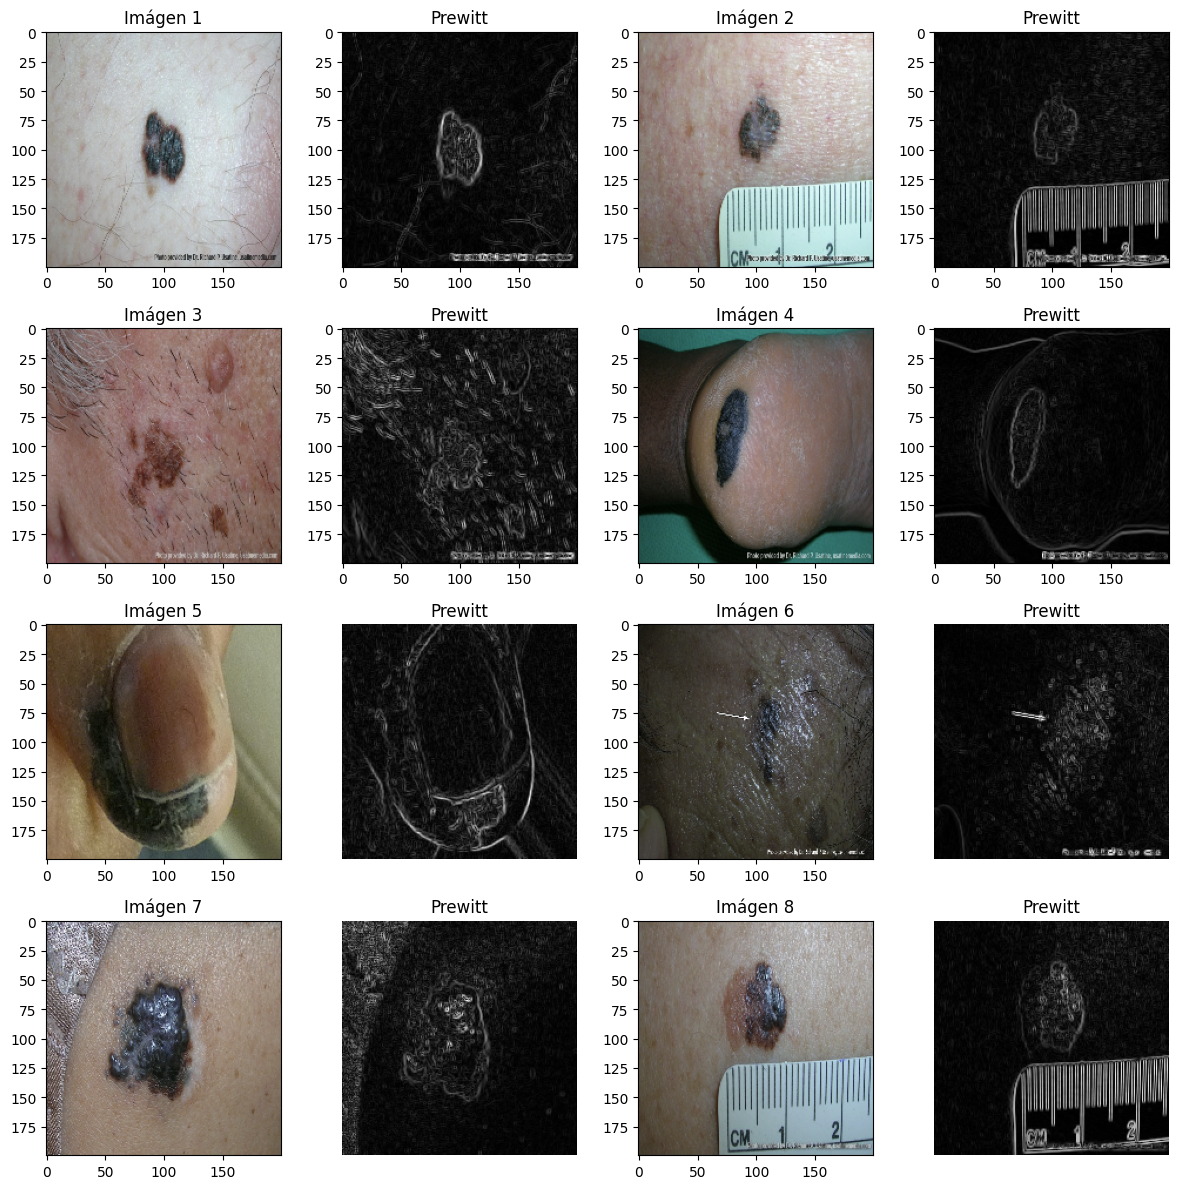

In [6]:
def prewitt_8_directions(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    edges = np.zeros_like(gray)
    for i in range(8):
        if i % 2 == 0:
            kernel = kernel_x if i < 4 else kernel_y
        else:
            kernel = kernel_y if i < 4 else kernel_x
        dst = cv2.filter2D(gray, cv2.CV_64F, kernel)
        edges = np.maximum(edges, np.abs(dst))

    edges = (edges / edges.max() * 255).astype(np.uint8)

    return edges

desired_size = (200, 200)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for i in range(1, 9):
    image = cv2.imread(f'Images/imagen{i}.png')
    resized_image = cv2.resize(image, desired_size)

    edges = prewitt_8_directions(resized_image)

    axs[(i-1)//2, (i-1)%2*2].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    axs[(i-1)//2, (i-1)%2*2].set_title(f'Imágen {i}')
    axs[(i-1)//2, (i-1)%2*2+1].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    axs[(i-1)//2, (i-1)%2*2+1].set_title('Prewitt')

for i in range(4):
    for j in range(4):
        if j % 2 != 0 and i >= 2:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()


# Segunda aproximación de la aplicación filtro Prewitt

## Metodología

1. Definición de la función prewitt_8_directions(image):

Esta función toma una imagen de entrada en formato BGR y aplica el filtro de Prewitt en 8 direcciones para detectar los bordes en la imagen.

2. Conversión de la imagen a escala de grises:

Se utiliza la función cv2.cvtColor() para convertir la imagen de entrada a escala de grises, lo que simplifica el procesamiento y reduce el costo computacional.

<p>&nbsp;</p>

3. Definición de los kernels de convolución para las 8 direcciones:

Se definen 8 kernels de convolución específicos para cada una de las 8 direcciones del filtro de Prewitt. Cada kernel representa una dirección diferente, como derecha, izquierda, arriba, abajo y diagonales.

4. Convolución de la imagen con los kernels:

Se itera sobre cada kernel definido y se aplica la función cv2.filter2D() para convolucionar la imagen en escala de grises con cada uno de los kernels.
Se utiliza la función np.maximum() para combinar los resultados de las convoluciones y obtener los valores máximos de los gradientes en cada píxel.

5. Normalización de los valores de píxeles en el rango [0, 255]:

Se normalizan los valores de los gradientes resultantes para asegurar que estén en el rango válido de valores de píxeles (0 a 255) utilizando la función astype(np.uint8).

6. Visualización de las imágenes:

Se define un tamaño deseado para las imágenes de salida.
Se crea un grid de subgráficos utilizando plt.subplots() para mostrar las imágenes originales y las imágenes con los bordes detectados utilizando el filtro de Prewitt en 8 direcciones.
Se cargan y redimensionan las imágenes de entrada utilizando la biblioteca OpenCV (cv2).
Se aplica la función prewitt_8_directions() para detectar los bordes en cada imagen de entrada.

7. Visualización de las imágenes resultantes:

Se muestran las imágenes originales y las imágenes con los bordes detectados en el grid de subgráficos utilizando imshow() y set_title() para etiquetar cada imagen.

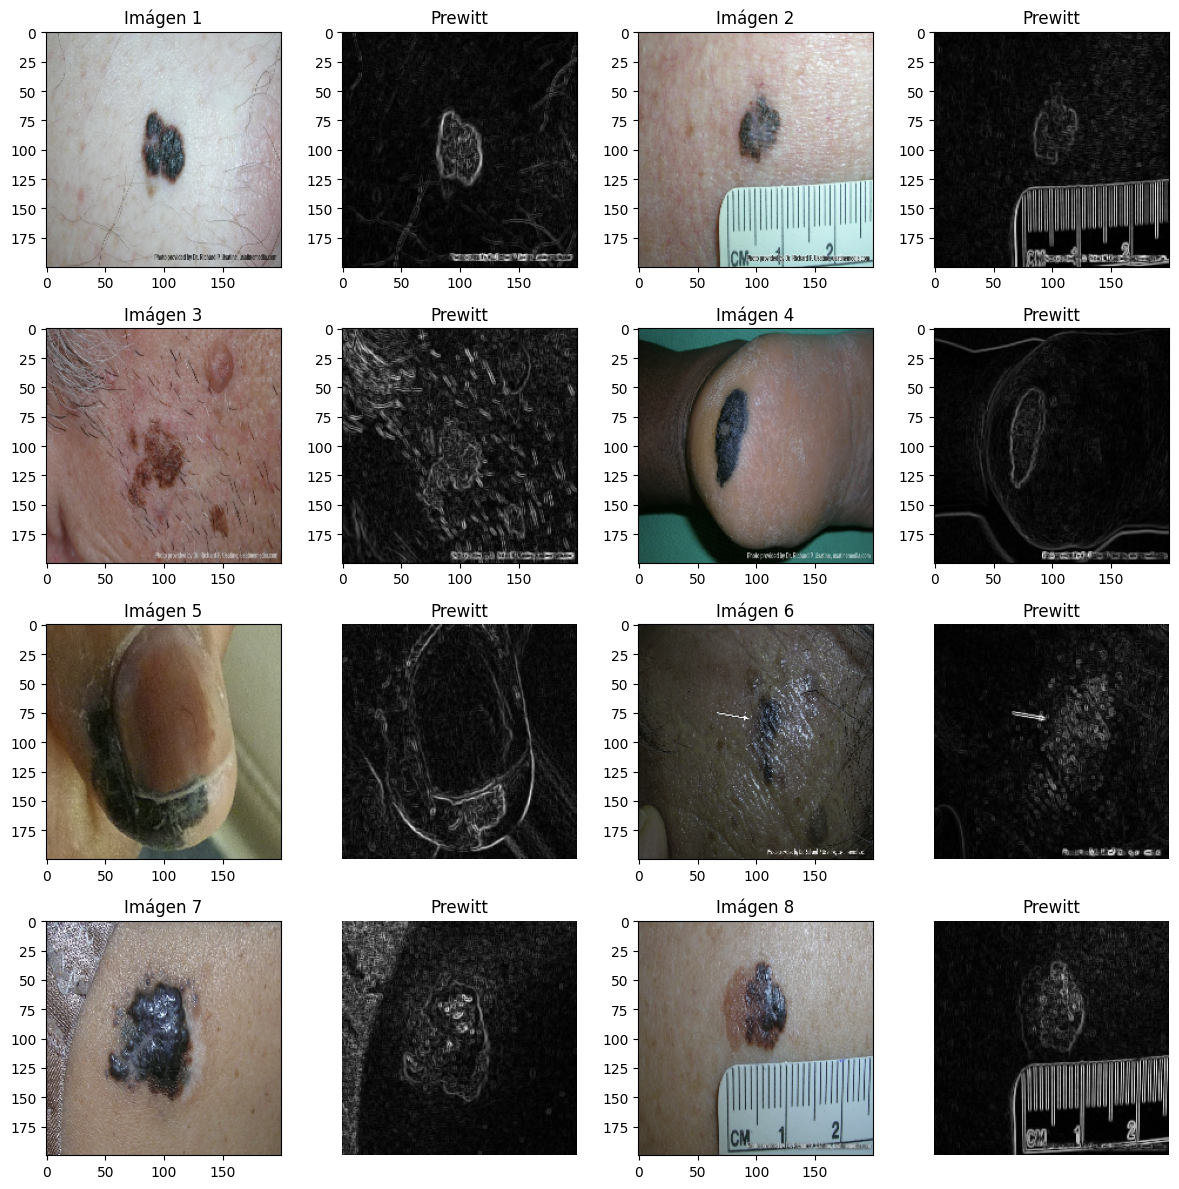

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_8_directions(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernels = [
        np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),  # Derecha
        np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),  # Abajo
        np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),  # Izquierda
        np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]),  # Arriba
        np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]]),  # Diagonal derecha-arriba
        np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]]),  # Diagonal izquierda-abajo
        np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]]),  # Diagonal derecha-abajo
        np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])   # Diagonal izquierda-arriba
    ]

    edges = np.zeros_like(gray)
    for kernel in kernels:
        dst = cv2.filter2D(gray, cv2.CV_64F, kernel)
        edges = np.maximum(edges, np.abs(dst))

    edges = (edges / edges.max() * 255).astype(np.uint8)

    return edges

desired_size = (200, 200)

fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for i in range(1, 9):
    image = cv2.imread(f'Images/imagen{i}.png')
    resized_image = cv2.resize(image, desired_size)

    edges = prewitt_8_directions(resized_image)

    axs[(i-1)//2, (i-1)%2*2].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    axs[(i-1)//2, (i-1)%2*2].set_title(f'Imágen {i}')
    axs[(i-1)//2, (i-1)%2*2+1].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    axs[(i-1)//2, (i-1)%2*2+1].set_title('Prewitt')

for i in range(4):
    for j in range(4):
        if j % 2 != 0 and i >= 2:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()


# Resultados

La aplicación del filtro de Prewitt en 8 direcciones en el análisis de imágenes de melanomas cutáneos ofrece resultados prometedores en términos de detección de bordes mejorada y análisis morfológico detallado. En adición se puede detallar los bordes del melanoma en relieve, por lo cual de esta manera pueden ser clasificados con un contraste mayor a una imágen plana.

<p>&nbsp;</p>
<p>&nbsp;</p>
<p>&nbsp;</p>

# Bibliografía

- Banco de imágenes: https://www.cancer.org/es/cancer/tipos/cancer-de-piel/galeria-de-imagenes-del-cancer-de-piel.html?filter=Melanoma

- https://fundaciondescubre.es/noticias/desarrollan-una-herramienta-basada-en-inteligencia-artificial-para-mejorar-la-precision-de-deteccion-del-melanoma/

- Inspiración: Gracias a la detección temprana de un melanoma en una falange distal mi abuelita aún sigue acompañandonos.

